# Homework 4 LSI Tutorial 

## Lara Schmalenstroer

## 29.11.2020

### Defining the needed functions

In [1]:
def base_count(gene):
    count_A=0
    count_C=0
    count_G=0
    count_T=0
    for value in gene:
        count_A+=gene[value].count('A')
        count_C+=gene[value].count('C')
        count_G+=gene[value].count('G')
        count_T+=gene[value].count('T')
    result={'A':count_A,'C':count_C,'G':count_G,'T':count_T}
    return result

In [2]:
def exon_count(gene):
    count_exon=gene.count('exon')
    return count_exon

In [3]:
def intron_count(gene):
    count_intron=gene.count('intron')
    return count_intron

In [4]:
def length_exon(gene):
    length=0
    for key in gene:
        if 'exon' in key or 'cds' in key:
            length+=gene[key].count('A')+gene[key].count('C')+gene[key].count('G')+gene[key].count('T')
    return length

In [5]:
def length_intron(gene):
    length=0
    for key in gene:
        if 'intron' in key:
            length+=gene[key].count('A')+gene[key].count('C')+gene[key].count('G')+gene[key].count('T')
    return length

In [6]:
def gc_ratio(gene):
    g_content=base_count(gene)['G']
    c_content=base_count(gene)['C']
    ratio=round((g_content+c_content)/len(gene)*100,2)
    return ratio

In [7]:
def at_ratio(gene):
    gc_content=gc_ratio(gene)
    at_content=100-gc_content
    return at_content

In [8]:
def length_gene(gene):
    count=base_count(gene)['A']+base_count(gene)['C']+base_count(gene)['G']+base_count(gene)['T']
    return count

### Import and processing of the files

In [9]:
import os, glob

In [10]:
dict_cycs={}
path='C:\\Users\\Lara\\'
os.chdir(path)
for file in glob.glob('*CYCS*'):
    dict_fragments={}
    with open(file,'r') as data:
        content=data.read()
        sequences=content.split('>')[1:]
        for seq in sequences:
            seq=seq.partition('\n')
            dict_sequence[seq[0]]=seq[2].replace('\n','')
            #print(dict_sequence[seq[0]],'\n')
        introns=intron_count(content)
        exons=exon_count(content)
        #print(introns,exons)
        basecount=base_count(dict_sequence)
        #print(basecount)
        total_length=length_gene(dict_sequence)
        #print(total_length)
        exon_length=length_exon(dict_sequence)
        #print(exon_length)
        intron_length=length_intron(dict_sequence)
        #print(intron_length)
        gc_content=round((basecount['C']+basecount['G'])/total_length*100,2)
        #print(gc_content)
        at_content=100-gc_content
        #print(at_content)
        dict_cycs[file.replace('.txt','')]=[total_length,introns,intron_length,exons,exon_length,gc_content,at_content]

In [11]:
print(dict_cycs)

{'Chimp_CYCS': [2904, 6, 1259, 7, 1645, 64.84, 35.16], 'CYCS_dog': [2856, 2, 1208, 3, 1648, 47.16, 52.84], 'homo_Variant 1_CYCS': [5271, 2, 1173, 3, 4098, 43.01, 56.99], 'homo_Variant 2_CYCS': [1943, 2, 969, 3, 974, 44.0, 56.0], 'homo_Variant 3_CYCS': [1817, 3, 1018, 4, 799, 45.18, 54.82], 'homo_Variant 4_CYCS': [1545, 3, 1047, 4, 498, 47.51, 52.49], 'Zebrasfish_CYCS': [5156, 4, 4384, 5, 772, 33.69, 66.31]}


### Export as .csv file and import as pandas dataframe

In [12]:
import csv
row_names=['Name','length of the gene','number of introns','length of introns','number of exons','length of exons',\
          'GC content in %','AT content in %']
with open('Results.csv','w',newline='') as writeFile:
    writer=csv.writer(writeFile)
    writer.writerow(row_names)
    for key in dict_cycs.keys():
        writer.writerow([key]+dict_cycs[key])

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataresult=pd.read_csv(path+'Results.csv',index_col='Name')

dataresult

,length of the gene,number of introns,length of introns,number of exons,length of exons,GC content in %,AT content in %
Name,,,,,,,
Chimp_CYCS,2904,6,1259,7,1645,64.84,35.16
CYCS_dog,2856,2,1208,3,1648,47.16,52.84
homo_Variant 1_CYCS,5271,2,1173,3,4098,43.01,56.99
homo_Variant 2_CYCS,1943,2,969,3,974,44.00,56.00
homo_Variant 3_CYCS,1817,3,1018,4,799,45.18,54.82
homo_Variant 4_CYCS,1545,3,1047,4,498,47.51,52.49
Zebrasfish_CYCS,5156,4,4384,5,772,33.69,66.31


In [14]:
results_transposed=dataresult.T
results_transposed

Name,Chimp_CYCS,CYCS_dog,homo_Variant 1_CYCS,homo_Variant 2_CYCS,homo_Variant 3_CYCS,homo_Variant 4_CYCS,Zebrasfish_CYCS
length of the gene,2904.00,2856.00,5271.00,1943.0,1817.00,1545.00,5156.00
number of introns,6.00,2.00,2.00,2.0,3.00,3.00,4.00
length of introns,1259.00,1208.00,1173.00,969.0,1018.00,1047.00,4384.00
number of exons,7.00,3.00,3.00,3.0,4.00,4.00,5.00
length of exons,1645.00,1648.00,4098.00,974.0,799.00,498.00,772.00
GC content in %,64.84,47.16,43.01,44.0,45.18,47.51,33.69
AT content in %,35.16,52.84,56.99,56.0,54.82,52.49,66.31


### Plotting of the data using matplotlib.pyplot

Text(0.5,1,'Lengths of the Cytochrome C genes from different species')

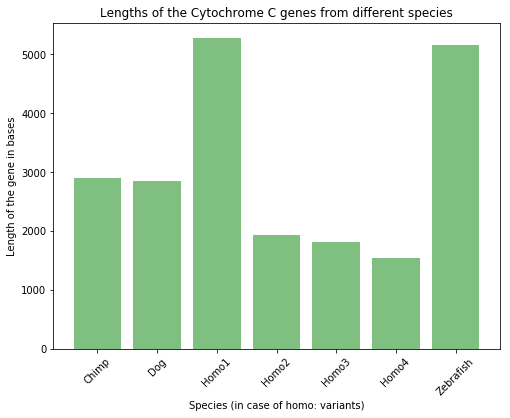

In [15]:
names=['Chimp','Dog','Homo1','Homo2','Homo3','Homo4','Zebrafish']
gene_lengths=results_transposed.iloc[0]
x_pos=np.arange(len(gene_lengths))

plt.figure(figsize=(8,6))

plt.bar(x_pos,gene_lengths,align='center',alpha=0.5, color='green')
plt.xticks(x_pos,names,rotation=45)
plt.ylabel('Length of the gene in bases')
plt.xlabel('Species (in case of homo: variants)')
plt.title('Lengths of the Cytochrome C genes from different species')

<function matplotlib.pyplot.show(*args, **kw)>

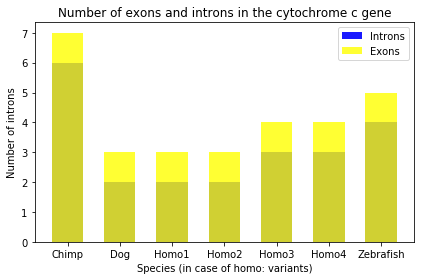

In [16]:
number_of_introns=results_transposed.iloc[1]
number_of_exons=results_transposed.iloc[3]

fig, ax=plt.subplots()
index=np.arange(len(number_of_introns))
bar_width=0.6

introns=plt.bar(names,number_of_introns,bar_width, alpha=0.9,color='blue',label='Introns')
exons=plt.bar(names,number_of_exons,bar_width,alpha=0.8,color='yellow',label='Exons')

plt.xlabel('Species (in case of homo: variants)')
plt.ylabel('Number of introns')
plt.title('Number of exons and introns in the cytochrome c gene')
plt.xticks(index)
plt.legend()

plt.tight_layout()
plt.show


### Plotting of the pie charts with pandas

In [34]:
dict_gc_at={key:[dict_cycs[key][5],dict_cycs[key][6]] for key in dict_cycs}
df_gc_at=pd.DataFrame(dict_gc_at, index=['GC content in %','AT content in %'])

In [35]:
df_gc_at

,Chimp_CYCS,CYCS_dog,homo_Variant 1_CYCS,homo_Variant 2_CYCS,homo_Variant 3_CYCS,homo_Variant 4_CYCS,Zebrasfish_CYCS
GC content in %,64.84,47.16,43.01,44.0,45.18,47.51,33.69
AT content in %,35.16,52.84,56.99,56.0,54.82,52.49,66.31


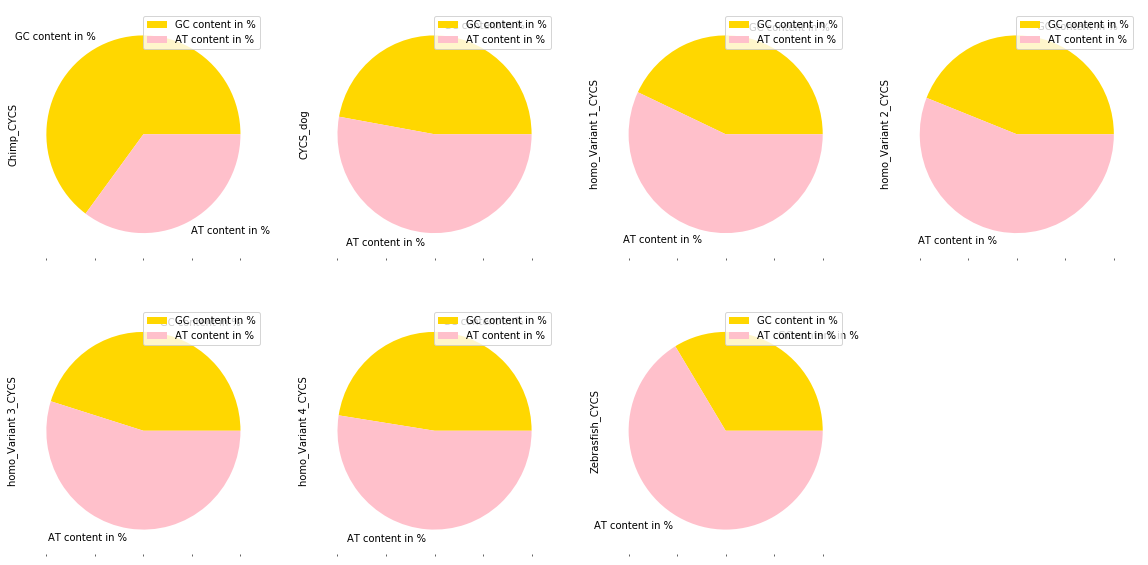

In [42]:
pie_plot=df_gc_at.plot.pie(subplots=True,figsize=(20,10),layout=(2,4),colors=['gold','pink'])